### GW tutorial 2: Detector noise and GW150914

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [2]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [3]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [5]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)
print(data)

[-1.00432555e-18 -9.58114996e-19 -9.03059379e-19 ... -1.10862808e-18
 -1.13349772e-18 -1.12487097e-18]


**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [21]:
print(f"duration:{data.duration} s")
print(f"sampling rate: {data.sample_rate} Hz")
print(f"data points: {len(data)}")
# delta t is the spacing in time, delta f is spacing in frquency
print(f"delta_f: {1/data.duration}")
print(f"delta_t: {1/data.sample_rate}")
# the relation to data points:
print(f"{data.duration/len(data)}") # delta t
print(f"{data.sample_rate/len(data)}") # delta f

duration:32.0 s
sampling rate: 4096.0 Hz
data points: 131072
delta_f: 0.03125
delta_t: 0.000244140625
0.000244140625
0.03125


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

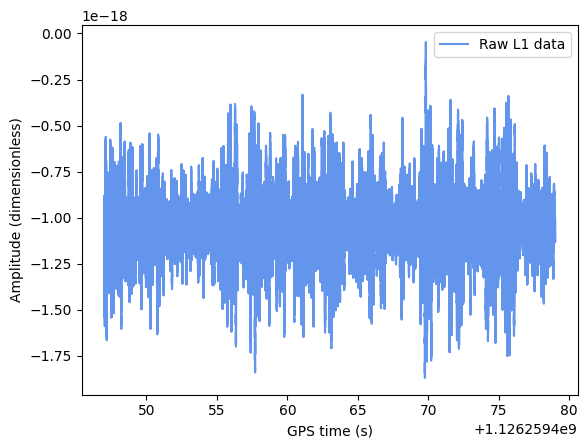

In [51]:
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()
plt.show()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

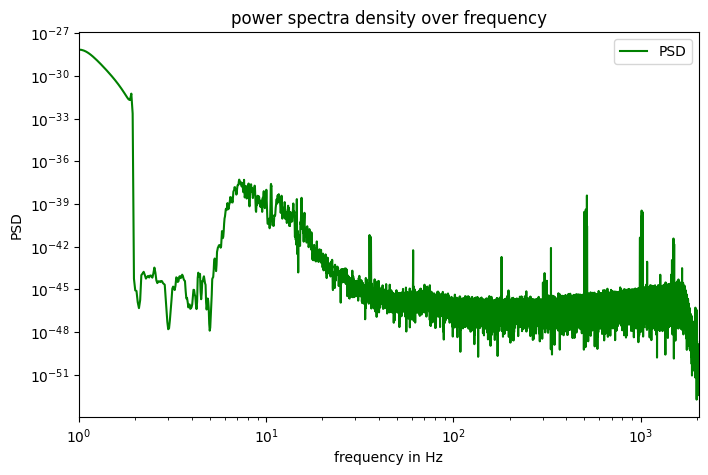

In [52]:
delta_f = 1/data.duration
min_f = 1 #in Hz
# max frequency is found with nyquist frequency = 1/2*delta_f
max_f = data.sample_rate/2
# psd stands for the power sectra density
psd = data.filter_psd(data.duration, delta_f, min_f)
# frequency
f = np.linspace(min_f, max_f, len(psd))
# plotting the data
plt.figure(figsize=(8, 5))
plt.loglog(f, psd, label='PSD', color='green')
plt.xlim(min_f, max_f)
plt.xlabel('frequency in Hz')
plt.ylabel('PSD')
plt.title('power spectra density over frequency')
plt.legend()
plt.show()

The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


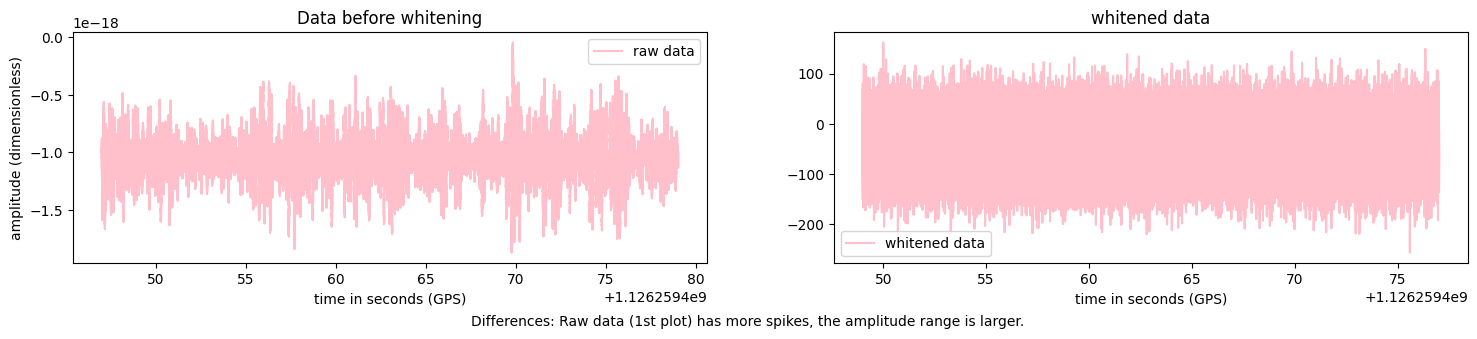

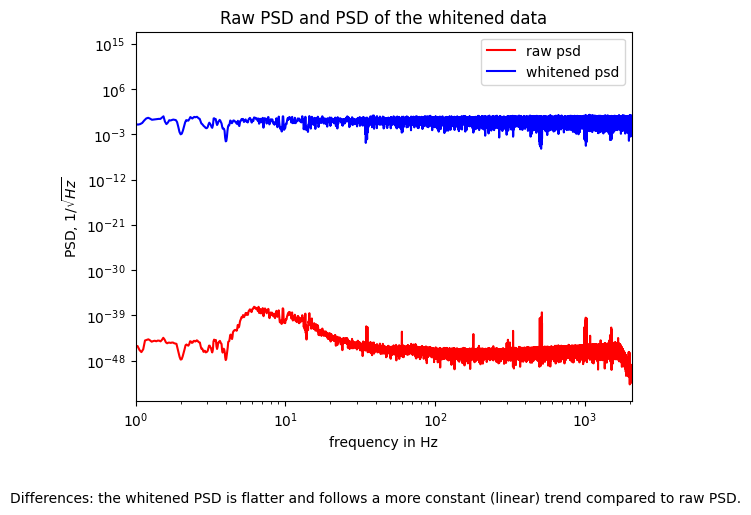

In [70]:
# whitening the data so that signals are less noisy
whitened_data = data.whiten(segment_duration= 4, max_filter_duration= 4) # 4 is chosen to shorten the dataset because there is a weird behavior on lower frequencies
# esitaming psd of the whitened data
psd_whitened = whitened_data.filter_psd(whitened_data.duration, whitened_data.delta_f, 1)

# plotting the data before and after whitening
fig=plt.figure(figsize=(18, 3))
plt.figtext(0.5, -0.1, "Differences: Raw data (1st plot) has more spikes, the amplitude range is larger.", ha="center")
# the first subplot
plt.subplot(1,2,1) #(1,2,1) = (rows, columns, position of the 1st subplot)
plt.plot(data.sample_times, data, label='raw data', color='pink')
plt.title('Data before whitening')
plt.xlabel('time in seconds (GPS)')
plt.ylabel('amplitude (dimensionless)')
plt.legend()
# the second subplot
plt.subplot(1,2,2)
plt.plot(whitened_data.sample_times, whitened_data, label='whitened data', color='pink')
plt.xlabel('time in seconds (GPS)')
plt.title('whitened data')
plt.legend()
plt.show()

# plotting psd and whitened psd in one plot
plt.loglog(psd.get_sample_frequencies(), psd, label='raw psd', color='red')
plt.loglog(psd_whitened.get_sample_frequencies(), psd_whitened, label='whitened psd', color='blue')
plt.figtext(0.5, -0.1, "Differences: the whitened PSD is flatter and follows a more constant (linear) trend compared to raw PSD.", ha="center")
plt.xlim(1, data.sample_rate/2)
plt.xlabel('frequency in Hz')
plt.ylabel('PSD, $1/\sqrt{Hz}$')
plt.title('Raw PSD and PSD of the whitened data')
plt.legend()
plt.show()

Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

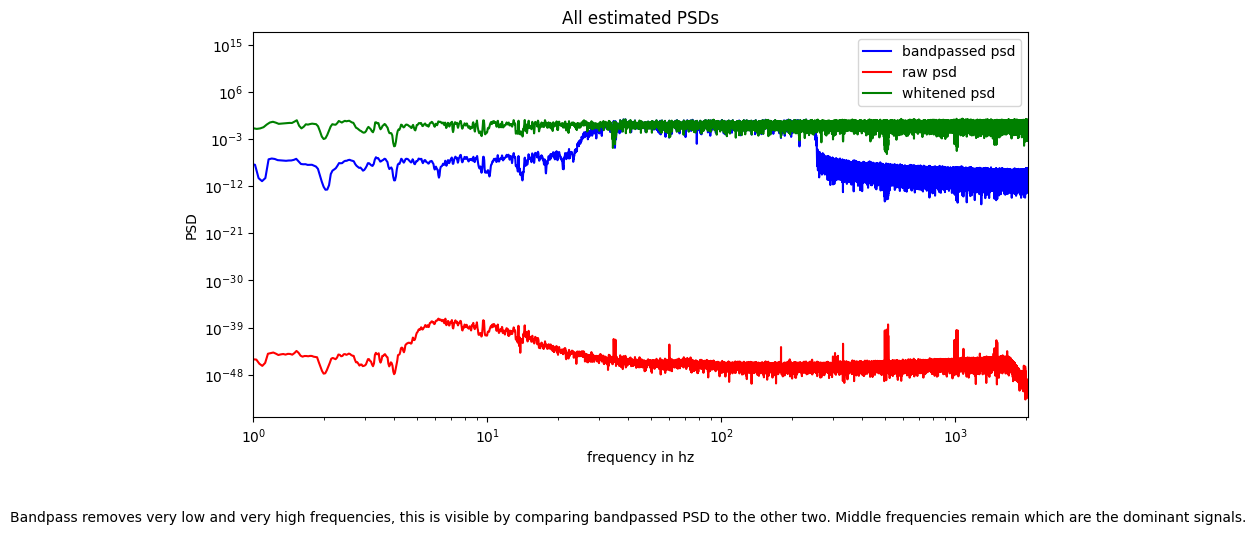

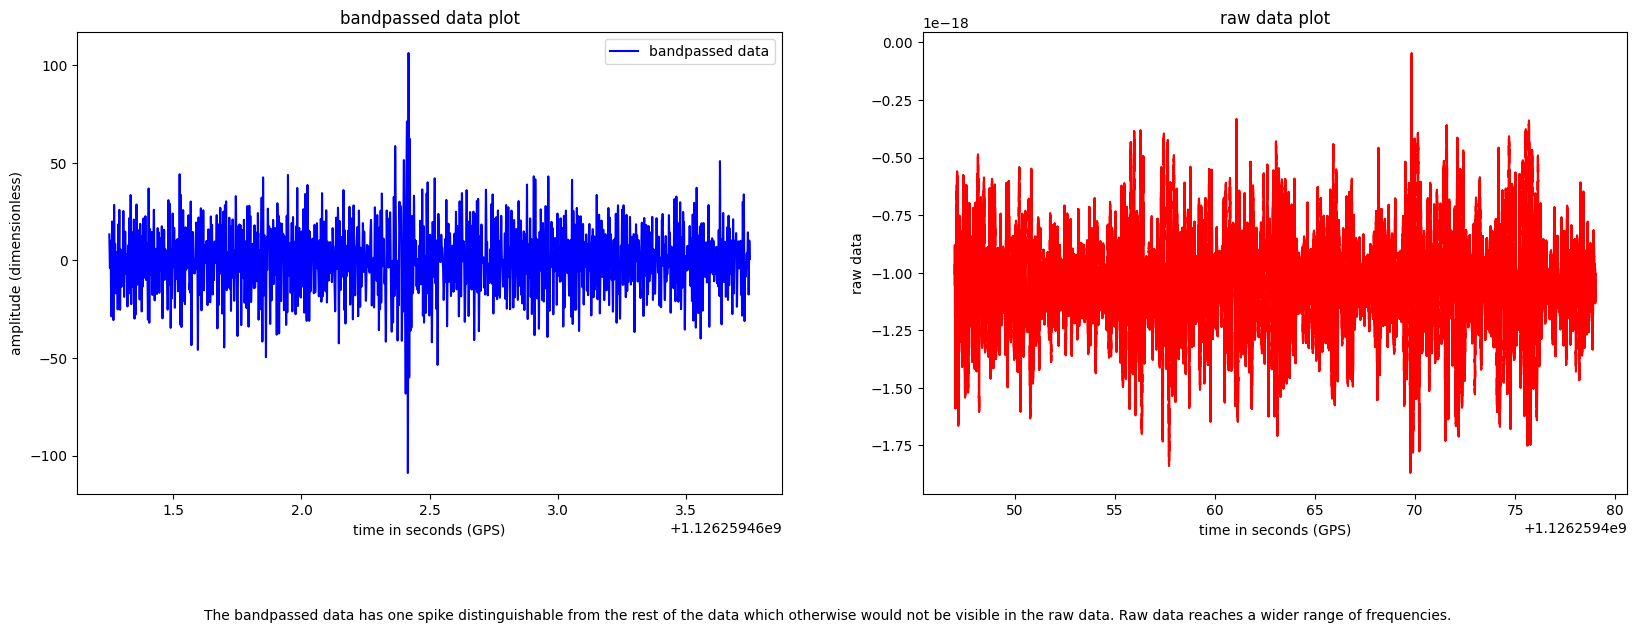

In [96]:
# applying the low pass filter and high pass filter
low_data = whitened_data.lowpass_fir(250, order=512, beta=5.0, remove_corrupted=True)
high_data = low_data.highpass_fir(30, order=512, beta=5.0, remove_corrupted=True)
# finding psd of the bandpassed data
psd_high = high_data.filter_psd(high_data.duration, high_data.delta_f, 1)

# plotting raw, whitened, and bandpassed psd
plt.figure(figsize=(10,5))
plt.loglog(psd_high.get_sample_frequencies(), psd_high, label='bandpassed psd', color='blue')
plt.loglog(psd.get_sample_frequencies(), psd, label='raw psd', color='red')
plt.loglog(psd_whitened.get_sample_frequencies(), psd_whitened, label='whitened psd', color='green')
plt.xlim(1, data.sample_rate/2)
plt.xlabel('frequency in hz')
plt.ylabel('PSD')
plt.title('All estimated PSDs')
plt.figtext(0.5, -0.1, "Bandpass removes very low and very high frequencies, this is visible by comparing bandpassed PSD to the other two. Middle frequencies remain which are the dominant signals.", ha='center')
plt.legend()
plt.show()

# cropping 122s on the left and 13s on the right of the bandpassed data
bandpassed_data = high_data.crop(12, 13)

# plotting the cropped data
fig1=plt.figure(figsize=(20, 6))
plt.figtext(0.5, -0.1, "The bandpassed data has one spike distinguishable from the rest of the data which otherwise would not be visible in the raw data. Raw data reaches a wider range of frequencies.", ha='center')
# bandpassed data plot
plt.subplot(1,2,1)
plt.plot(bandpassed_data.sample_times, bandpassed_data, label='bandpassed data', color='blue')
plt.title('bandpassed data plot')
plt.xlabel('time in seconds (GPS)')
plt.ylabel('amplitude (dimensionless)')
plt.legend()
# raw data plot
plt.subplot(1,2,2)
plt.plot(data.sample_times, data, label='raw data', color='red')
plt.title('raw data plot')
plt.xlabel('time in seconds (GPS)')
plt.ylabel('raw data')
plt.show()

**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

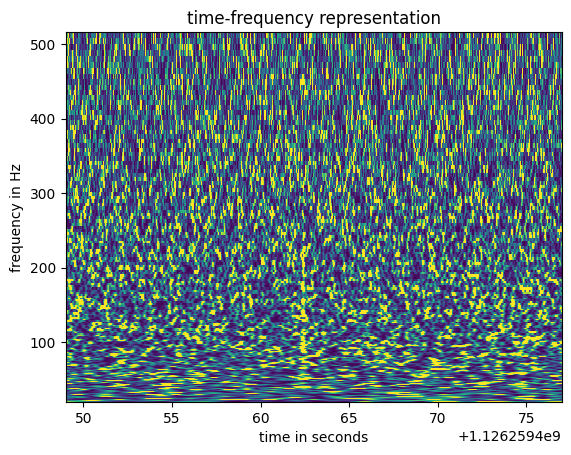

In [92]:
# qtransform returns the time and frequencies that the qtransform is sampled and qplane (the two dimensional interpolated qtranform of this time series)
times, frequencies, qplane = whitened_data.qtransform(delta_t=None, delta_f=None, frange=(20, 512), qrange=(110, 110), mismatch=0.2, return_complex=False, logfsteps=200)
# plotting the spectrogram
plt.pcolormesh(times, frequencies, qplane, shading='auto', vmax=3.5)
plt.xlabel('time in seconds')
plt.ylabel('frequency in Hz')
plt.title('time-frequency representation')
plt.show()

As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


Good job! This is the end of the second part. Maybe you can go for a break?